In [8]:
import numpy as np
import numpy.random as rnd

In [2]:
def conf_int_95(y):
    a = np.mean(y)
    b = np.sqrt(np.var(y, ddof=1))
    return (a-1.96*b, a+1.96*b)

In [3]:
conf_int_95([1,2,3,4,5,6,7,8,3,2,4,5,6,3,5,4,6,7,5])

(0.8092900024021996, 8.243341576545168)

In [4]:
def mapping(u):
    if u <= 1/4:
        return 0
    elif u <= 3/8:
        return 1
    elif u <= 3/8+1/12:
        return 2
    elif u <= 3/8+1/12+1/6:
        return 3
    elif u <= 3/8+1/12+1/6+1/24:
        return 4
    else:
        return 5

In [5]:
mapping(np.random.rand(1))

5

In [7]:
l = np.zeros(6)
for i in range(10000):
    x = mapping(np.random.rand(1))
    l[x]+=1
l = l/10000
print(l)

[0.2542 0.1191 0.0826 0.1701 0.0399 0.3341]


In [9]:
def simrun(m):
    seats = np.array([True]*m)
    s = rnd.randint(m) # first person
    seats[s] = False
    for p in range(1,m-1): # persons 2,...,m-1
        if seats[p]: # his seat is available
            seats[p] = False # set seat as taken
        else: # chooses random from available
            a = np.where(seats==True) # available seats
            s = rnd.randint(m-p)
            i = a[0][s]
            seats[i] = False
    if seats[-1]:
        return 1 # last person has his own seat
    else:
        return 0

In [55]:
def simulations(m,n):
    y = np.zeros(n)
    for i in range(n):
        y[i] = simrun(m)
    est = np.mean(y)
    s2 = np.var(y,ddof=1)
    se = np.sqrt(s2/n)
    print('estimate:', est)
    print('se :', se)
    print('95% ci :', est-1.96*se, est+1.96*se)
    return est

In [56]:
simulations(m=20, n=100)

estimate: 0.48
se : 0.05021167315686782
95% ci : 0.381585120612539 0.578414879387461


0.48

In [57]:
simulations(m=20, n=10)

estimate: 0.7
se : 0.15275252316519464
95% ci : 0.4006050545962185 0.9993949454037814


0.7

In [58]:
simulations(m=20, n=1000)

estimate: 0.508
se : 0.015817274929209084
95% ci : 0.4769981411387502 0.5390018588612498


0.508

In [21]:
import matplotlib.pyplot as plt

estimate: 0.5
se : 0.16666666666666669
95% ci : 0.17333333333333328 0.8266666666666667
estimate: 0.2
se : 0.13333333333333336
95% ci : -0.06133333333333335 0.4613333333333334
estimate: 0.2
se : 0.13333333333333336
95% ci : -0.06133333333333335 0.4613333333333334
estimate: 0.7
se : 0.15275252316519464
95% ci : 0.4006050545962185 0.9993949454037814
estimate: 0.6
se : 0.16329931618554522
95% ci : 0.2799333402763314 0.9200666597236686
estimate: 0.8
se : 0.13333333333333333
95% ci : 0.5386666666666667 1.0613333333333332
estimate: 0.6
se : 0.1632993161855452
95% ci : 0.27993334027633143 0.9200666597236685
estimate: 0.3
se : 0.15275252316519464
95% ci : 0.0006050545962185128 0.5993949454037815
estimate: 0.8
se : 0.13333333333333336
95% ci : 0.5386666666666666 1.0613333333333335
estimate: 0.4
se : 0.16329931618554522
95% ci : 0.07993334027633142 0.7200666597236687
estimate: 0.6
se : 0.16329931618554522
95% ci : 0.2799333402763314 0.9200666597236686
estimate: 0.3
se : 0.15275252316519464
95% ci

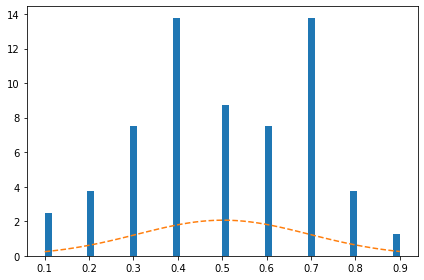

In [61]:
x0 = []
for i in range(50):
    x0.append(simulations(m=20, n=10))
x = np.array(x0)
print(conf_int_95(x))

num_bins = 50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

estimate: 0.58
se : 0.04960449637488583
95% ci : 0.4827751871052237 0.6772248128947762
estimate: 0.49
se : 0.05024183937956914
95% ci : 0.39152599481604444 0.5884740051839555
estimate: 0.5
se : 0.050251890762960605
95% ci : 0.4015062941045972 0.5984937058954027
estimate: 0.51
se : 0.05024183937956914
95% ci : 0.41152599481604446 0.6084740051839556
estimate: 0.5
se : 0.050251890762960605
95% ci : 0.4015062941045972 0.5984937058954027
estimate: 0.53
se : 0.050161355804659184
95% ci : 0.431683742622868 0.628316257377132
estimate: 0.48
se : 0.05021167315686782
95% ci : 0.381585120612539 0.578414879387461
estimate: 0.56
se : 0.04988876515698589
95% ci : 0.46221802029230774 0.6577819797076924
estimate: 0.53
se : 0.050161355804659184
95% ci : 0.431683742622868 0.628316257377132
estimate: 0.49
se : 0.05024183937956913
95% ci : 0.3915259948160445 0.5884740051839554
estimate: 0.49
se : 0.05024183937956913
95% ci : 0.3915259948160445 0.5884740051839554
estimate: 0.51
se : 0.05024183937956914
95% 

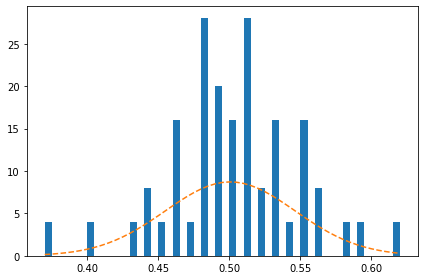

In [60]:
x0 = []
for i in range(50):
    x0.append(simulations(m=20, n=100))
x = np.array(x0)
print(conf_int_95(x))

num_bins = 50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

estimate: 0.51
se : 0.015816135752773183
95% ci : 0.47900037392456457 0.5409996260754355
estimate: 0.498
se : 0.01581917337430266
95% ci : 0.4669944201863668 0.5290055798136332
estimate: 0.534
se : 0.01578268332993769
95% ci : 0.5030659406733221 0.564934059326678
estimate: 0.508
se : 0.015817274929209084
95% ci : 0.4769981411387502 0.5390018588612498
estimate: 0.488
se : 0.015814743314581686
95% ci : 0.4570031031034199 0.5189968968965801
estimate: 0.521
se : 0.015805341148131185
95% ci : 0.4900215313496629 0.5519784686503372
estimate: 0.525
se : 0.01579951342999602
95% ci : 0.49403295367720784 0.5559670463227923
estimate: 0.457
se : 0.0157606915901365
95% ci : 0.4261090444833325 0.48789095551666756
estimate: 0.485
se : 0.01581217964181488
95% ci : 0.4540081279020428 0.5159918720979572
estimate: 0.481
se : 0.015807874268505835
95% ci : 0.45001656643372856 0.5119834335662714
estimate: 0.51
se : 0.015816135752773183
95% ci : 0.47900037392456457 0.5409996260754355
estimate: 0.503
se : 0.01

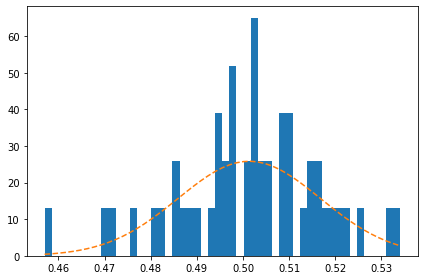

In [59]:
x0 = []
for i in range(50):
    x0.append(simulations(m=20, n=1000))
x = np.array(x0)
print(conf_int_95(x))

num_bins =  50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
fig.tight_layout()
plt.show()

(0.48982678571899846, 0.5068452142810015)


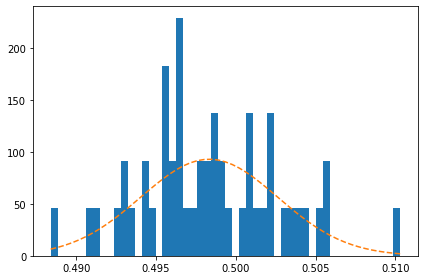

In [54]:
x0 = []
for i in range(50):
    x0.append(simulations(m=20, n=10000))
x = np.array(x0)
print(conf_int_95(x))

num_bins =  50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()